## 🧩 Imports & Configuration

In [1]:
import numpy as np
import random
import requests
import matplotlib.pyplot as plt

## ⚙️ GA Parameters

In [13]:
POP_SIZE = 50
MUTATION_RATE = 0.2
GENERATIONS = 5000

## 🧠 Generate Individual

In [3]:
def generate_individual(puzzle):
    individual = np.zeros((9,9), dtype=int)
    for i in range(9):
        nums = set(range(1,10)) - set(puzzle[i])
        row = puzzle[i].copy()
        for j in range(9):
            if row[j] == 0:
                val = random.choice(list(nums))
                row[j] = val
                nums.remove(val)
        individual[i] = row
    return individual

## 🧮 Calculate Fitness

In [4]:
def calculate_fitness(individual):
    score = 0
    for row in individual:
        score += len(set(row))
    for col in individual.T:
        score += len(set(col))
    for i in range(0,9,3):
        for j in range(0,9,3):
            block = individual[i:i+3, j:j+3].flatten()
            score += len(set(block))
    return score

## 🔀 Crossover

In [5]:
def crossover(parent1, parent2):
    child = np.zeros((9, 9), dtype=int)
    
    # List of all 9 block positions (top-left corners)
    blocks = [(r, c) for r in range(0, 9, 3) for c in range(0, 9, 3)]
    random.shuffle(blocks)  # Shuffle block order
    
    i = random.randint(0, 9)  # Number of blocks to take from parent1
    
    # Take first i blocks from parent1
    for r, c in blocks[:i]:
        child[r:r+3, c:c+3] = parent1[r:r+3, c:c+3]
    
    # Take remaining blocks from parent2
    for r, c in blocks[i:]:
        child[r:r+3, c:c+3] = parent2[r:r+3, c:c+3]
    
    return child

## 🧬 Mutation

In [6]:
def mutate(individual, fixed_positions):
    for i in range(9):
        if random.random() < MUTATION_RATE:
            available = [j for j in range(9) if not fixed_positions[i][j]]
            if len(available) >= 2:
                a, b = random.sample(available, 2)
                individual[i][a], individual[i][b] = individual[i][b], individual[i][a]
    return individual

## 📌 Fixed Positions

In [7]:
def get_fixed_positions(puzzle):
    fixed = np.zeros((9,9), dtype=bool)
    fixed[puzzle != 0] = True
    return fixed

## 🔁 Genetic Algorithm Core

In [15]:
def genetic_algorithm(puzzle):
    fixed_positions = get_fixed_positions(puzzle)
    population = [generate_individual(puzzle) for _ in range(POP_SIZE)]
    best_fitness_over_time = []
    best_individual, best_fitness = None, 0

    for gen in range(GENERATIONS):
        # 1️⃣ Calculate fitness
        fitness_scores = [calculate_fitness(ind) for ind in population]

        # 2️⃣ Keep track of best
        gen_best = max(fitness_scores)
        best_fitness_over_time.append(gen_best)
        if gen_best > best_fitness:
            best_fitness = gen_best
            best_individual = population[fitness_scores.index(gen_best)]

        # ✅ Stop early if solved
        if best_fitness == 243:
            print(f"✅ Sudoku solved at generation {gen}!")
            break

        # 3️⃣ Sort population by fitness descending
        sorted_population = [ind for _, ind in sorted(zip(fitness_scores, population), key=lambda x: x[0], reverse=True)]

        # 4️⃣ Elitism: keep top 2 unchanged
        new_population = sorted_population[:4]

        # 5️⃣ Generate remaining children using top 4 as deterministic parents
        while len(new_population) < POP_SIZE:
            parent1, parent2 = random.sample(new_population,2) # always top 2
            child = crossover(parent1, parent2)
            child = mutate(child, fixed_positions)
            new_population.append(child)

        population = new_population

        # ✅ Print progress every 50 generations
        if gen % 50 == 0 or gen == GENERATIONS - 1:
            print(f"Generation {gen} | Best fitness: {best_fitness}")

    return best_individual, best_fitness_over_time

## 🧮 Display Sudoku Grid Nicely

In [9]:
def plot_sudoku_grid(ax, grid, title, color="black"):
    """Draws a Sudoku grid with numbers."""
    ax.set_title(title, fontsize=14, fontweight="bold", pad=10)
    ax.imshow(np.zeros((9, 9)), cmap="Greys", vmin=0, vmax=1)

    # Draw numbers
    for i in range(9):
        for j in range(9):
            num = grid[i, j]
            if num != 0:
                ax.text(j, i, str(num), va="center", ha="center", fontsize=16, color=color)

    # Draw thin lines for cells
    for x in range(10):
        lw = 1 if x % 3 else 3
        ax.axhline(x - 0.5, color="black", lw=lw)
        ax.axvline(x - 0.5, color="black", lw=lw)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-0.5, 8.5)
    ax.set_ylim(8.5, -0.5)


## 🌐 Set Puzzles 

In [17]:

EASY = [
    # EASY PUZZLE 1 (40 given digits)
    np.array([
        [5,3,0,0,7,0,0,0,0],
        [6,0,0,1,9,5,0,0,0],
        [0,9,8,0,0,0,0,6,0],
        [8,0,0,7,6,1,0,0,0],
        [4,0,0,8,0,3,0,0,1],
        [7,0,0,9,2,4,0,0,6],
        [0,6,0,0,0,0,2,8,0],
        [0,0,0,4,1,9,0,0,5],
        [0,0,0,0,8,0,0,7,9]
    ]),

    # EASY PUZZLE 2 (42 given digits)
    np.array([
        [8,2,0,1,5,4,0,0,6],
        [9,0,5,0,2,7,1,4,0],
        [0,4,1,0,0,0,7,5,2],
        [5,9,3,4,6,8,0,7,1],
        [4,7,0,5,0,3,6,8,9],
        [6,1,8,9,7,2,4,0,5],
        [7,8,6,0,3,5,0,1,4],
        [1,5,0,7,9,6,8,2,3],
        [2,3,9,8,4,1,5,6,7]
    ]),

    # EASY PUZZLE 3 (39 given digits)
    np.array([
        [4,1,0,3,6,9,0,0,5],
        [6,0,2,1,5,8,9,0,7],
        [0,5,8,0,0,4,3,1,0],
        [8,2,5,4,3,7,0,6,9],
        [7,9,1,0,8,6,4,3,2],
        [3,4,6,9,1,0,7,5,8],
        [1,7,0,6,4,3,5,8,2],
        [5,0,3,2,9,1,6,7,4],
        [2,6,4,8,7,5,1,9,3]
    ])
]

EASY_SOLUTIONS = [
    # SOLUTION 1
    np.array([
        [5,3,4,6,7,8,9,1,2],
        [6,7,2,1,9,5,3,4,8],
        [1,9,8,3,4,2,5,6,7],
        [8,5,9,7,6,1,4,2,3],
        [4,2,6,8,5,3,7,9,1],
        [7,1,3,9,2,4,8,5,6],
        [9,6,1,5,3,7,2,8,4],
        [2,8,7,4,1,9,6,3,5],
        [3,4,5,2,8,6,1,7,9]
    ]),

    # SOLUTION 2
    np.array([
        [8,2,7,1,5,4,3,9,6],
        [9,6,5,3,2,7,1,4,8],
        [3,4,1,6,8,9,7,5,2],
        [5,9,3,4,6,8,2,7,1],
        [4,7,2,5,1,3,6,8,9],
        [6,1,8,9,7,2,4,3,5],
        [7,8,6,2,3,5,9,1,4],
        [1,5,4,7,9,6,8,2,3],
        [2,3,9,8,4,1,5,6,7]
    ]),

    # SOLUTION 3
    np.array([
        [4,1,7,3,6,9,8,2,5],
        [6,3,2,1,5,8,9,4,7],
        [9,5,8,7,2,4,3,1,6],
        [8,2,5,4,3,7,1,6,9],
        [7,9,1,5,8,6,4,3,2],
        [3,4,6,9,1,2,7,5,8],
        [1,7,9,6,4,3,5,8,2],
        [5,8,3,2,9,1,6,7,4],
        [2,6,4,8,7,5,1,9,3]
    ])
]
MEDIUM = [
    np.array([
        [7, 0, 8, 5, 6, 0, 0, 0, 0],
        [3, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 4, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 8, 0, 0, 5, 6],
        [0, 8, 0, 0, 0, 0, 0, 1, 3],
        [0, 0, 3, 0, 0, 0, 9, 7, 0],
        [8, 6, 0, 0, 0, 0, 0, 0, 0],
        [0, 7, 1, 0, 4, 8, 3, 9, 0],
        [0, 0, 0, 0, 0, 5, 6, 0, 0]
    ]),
    np.array([
        [0, 0, 0, 0, 0, 0, 0, 3, 0],
        [1, 0, 0, 6, 7, 5, 8, 0, 9],
        [0, 0, 9, 0, 2, 0, 0, 0, 7],
        [4, 0, 1, 0, 0, 2, 0, 0, 0],
        [9, 0, 2, 0, 6, 0, 0, 0, 4],
        [0, 8, 0, 7, 9, 0, 0, 0, 6],
        [0, 0, 0, 3, 0, 6, 0, 0, 8],
        [0, 3, 8, 0, 0, 0, 0, 6, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]
    ]),
    np.array([
        [0, 0, 5, 1, 7, 0, 8, 3, 0],
        [0, 0, 9, 0, 0, 5, 0, 0, 0],
        [0, 1, 7, 8, 0, 6, 0, 2, 4],
        [7, 0, 1, 0, 0, 9, 0, 0, 0],
        [9, 5, 0, 0, 4, 1, 2, 0, 0],
        [2, 3, 0, 7, 0, 0, 0, 1, 5],
        [4, 0, 0, 0, 2, 7, 0, 9, 3],
        [1, 7, 0, 0, 8, 4, 0, 0, 2],
        [0, 0, 0, 6, 0, 0, 4, 0, 7]
    ])
]

MEDIUM_SOLUTIONS = [
    np.array([
        [7, 2, 8, 5, 6, 4, 1, 3, 9],
        [3, 5, 6, 8, 1, 9, 7, 2, 4],
        [1, 9, 4, 3, 7, 2, 8, 6, 5],
        [9, 1, 7, 4, 8, 3, 2, 5, 6],
        [2, 8, 5, 7, 9, 6, 4, 1, 3],
        [6, 4, 3, 2, 5, 1, 9, 7, 8],
        [8, 6, 2, 9, 3, 7, 5, 4, 1],
        [5, 7, 1, 6, 4, 8, 3, 9, 2],
        [4, 3, 9, 1, 2, 5, 6, 8, 7]
    ]),
    np.array([
        [7, 5, 6, 4, 8, 9, 2, 3, 1],
        [1, 2, 3, 6, 7, 5, 8, 4, 9],
        [8, 4, 9, 1, 2, 3, 6, 5, 7],
        [4, 6, 1, 8, 3, 2, 9, 7, 5],
        [9, 7, 2, 5, 6, 1, 3, 8, 4],
        [3, 8, 5, 7, 9, 4, 1, 2, 6],
        [2, 1, 7, 3, 4, 6, 5, 9, 8],
        [5, 3, 8, 9, 1, 7, 4, 6, 2],
        [6, 9, 4, 2, 5, 8, 7, 1, 3]
    ]),
    np.array([
        [6, 4, 5, 1, 7, 2, 8, 3, 9],
        [8, 2, 9, 4, 3, 5, 7, 6, 1],
        [3, 1, 7, 8, 9, 6, 5, 2, 4],
        [7, 6, 1, 2, 5, 9, 3, 4, 8],
        [9, 5, 8, 3, 4, 1, 2, 7, 6],
        [2, 3, 4, 7, 6, 8, 9, 1, 5],
        [4, 8, 6, 5, 2, 7, 1, 9, 3],
        [1, 7, 3, 9, 8, 4, 6, 5, 2],
        [5, 9, 2, 6, 1, 3, 4, 8, 7]
    ])
]


HARD = [
    np.array([
        [0, 7, 9, 0, 0, 2, 0, 0, 1],
        [0, 0, 0, 0, 6, 0, 0, 0, 0],
        [2, 6, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 8, 0, 0, 0, 0, 0, 0],
        [0, 0, 5, 0, 0, 6, 0, 0, 0],
        [0, 3, 0, 0, 0, 0, 6, 7, 0],
        [0, 0, 0, 0, 5, 7, 0, 0, 0],
        [0, 0, 0, 6, 9, 0, 0, 0, 0],
        [0, 0, 0, 0, 3, 8, 0, 0, 0]
    ]),
    np.array([
        [0, 0, 9, 0, 0, 0, 0, 0, 0],
        [0, 6, 0, 0, 0, 0, 0, 4, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 4, 0, 0, 0, 7, 5, 0],
        [6, 0, 2, 0, 7, 4, 0, 0, 0],
        [7, 0, 0, 0, 0, 9, 0, 0, 4],
        [0, 0, 0, 0, 5, 8, 0, 6, 0],
        [0, 0, 8, 0, 0, 0, 0, 0, 0],
        [5, 0, 0, 0, 0, 0, 0, 0, 0]
    ]),
    np.array([
        [5, 0, 6, 0, 0, 0, 7, 0, 0],
        [0, 9, 0, 5, 0, 6, 0, 0, 0],
        [7, 0, 8, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 7],
        [0, 0, 0, 0, 0, 0, 0, 0, 9],
        [0, 0, 0, 1, 8, 0, 0, 2, 5],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [3, 0, 2, 0, 5, 7, 0, 1, 4],
        [4, 6, 0, 0, 0, 0, 0, 0, 0]
    ])
]

HARD_SOLUTIONS = [
    np.array([
        [5, 7, 9, 3, 4, 2, 8, 6, 1],
        [4, 8, 1, 7, 6, 5, 3, 9, 2],
        [2, 6, 3, 9, 8, 1, 5, 4, 7],
        [6, 2, 8, 4, 7, 3, 1, 5, 9],
        [7, 9, 5, 8, 1, 6, 2, 3, 4],
        [1, 3, 4, 5, 2, 9, 6, 7, 8],
        [8, 4, 6, 1, 5, 7, 9, 2, 3],
        [3, 1, 2, 6, 9, 4, 7, 8, 5],
        [9, 5, 7, 2, 3, 8, 4, 1, 6]
    ]),
    np.array([
        [2, 7, 9, 4, 6, 3, 5, 1, 8],
        [1, 6, 5, 7, 8, 2, 9, 4, 3],
        [4, 8, 3, 1, 9, 5, 2, 7, 6],
        [8, 3, 4, 2, 1, 6, 7, 5, 9],
        [6, 9, 2, 5, 7, 4, 3, 8, 1],
        [7, 5, 1, 8, 3, 9, 6, 2, 4],
        [3, 1, 7, 9, 5, 8, 4, 6, 2],
        [9, 2, 8, 6, 4, 7, 1, 3, 5],
        [5, 4, 6, 3, 2, 1, 8, 9, 7]
    ]),
    np.array([
        [5, 2, 6, 8, 4, 9, 7, 3, 1],
        [1, 9, 3, 5, 7, 6, 2, 4, 8],
        [7, 4, 8, 2, 1, 3, 5, 9, 6],
        [2, 3, 1, 9, 6, 5, 4, 8, 7],
        [8, 5, 4, 7, 3, 2, 1, 6, 9],
        [6, 7, 9, 1, 8, 4, 3, 2, 5],
        [9, 1, 5, 4, 2, 8, 6, 7, 3],
        [3, 8, 2, 6, 5, 7, 9, 1, 4],
        [4, 6, 7, 3, 9, 1, 8, 5, 2]
    ])
]



## 🚀 Run Everything


🧩 Solving Easy Puzzles

🎯 Puzzle 1 (Easy)
Generation 0 | Best fitness: 210
Generation 50 | Best fitness: 224
Generation 100 | Best fitness: 226
Generation 150 | Best fitness: 227
Generation 200 | Best fitness: 228
Generation 250 | Best fitness: 229
Generation 300 | Best fitness: 230
Generation 350 | Best fitness: 231
Generation 400 | Best fitness: 233
Generation 450 | Best fitness: 234
Generation 500 | Best fitness: 234
Generation 550 | Best fitness: 234
Generation 600 | Best fitness: 234
Generation 650 | Best fitness: 234
Generation 700 | Best fitness: 234
Generation 750 | Best fitness: 234
Generation 800 | Best fitness: 234
Generation 850 | Best fitness: 234
Generation 900 | Best fitness: 234
Generation 950 | Best fitness: 234
Generation 1000 | Best fitness: 234
Generation 1050 | Best fitness: 234
Generation 1100 | Best fitness: 234
Generation 1150 | Best fitness: 234
Generation 1200 | Best fitness: 234
Generation 1250 | Best fitness: 234
Generation 1300 | Best fitness: 234
Generati

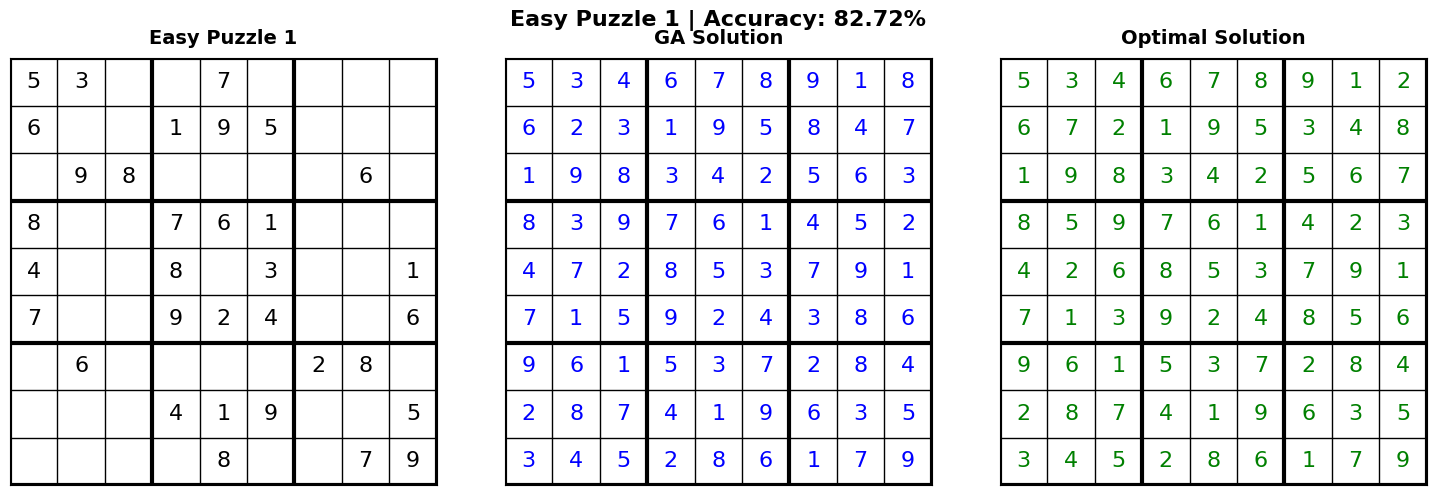

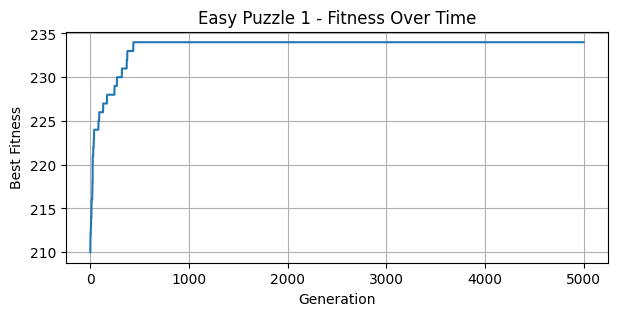

🎯 Accuracy (GA vs Optimal): 82.72%

🎯 Puzzle 2 (Easy)
Generation 0 | Best fitness: 237
Generation 50 | Best fitness: 241
Generation 100 | Best fitness: 241
Generation 150 | Best fitness: 241
Generation 200 | Best fitness: 241
Generation 250 | Best fitness: 241
Generation 300 | Best fitness: 241
Generation 350 | Best fitness: 241
Generation 400 | Best fitness: 241
Generation 450 | Best fitness: 241
Generation 500 | Best fitness: 241
Generation 550 | Best fitness: 241
Generation 600 | Best fitness: 241
Generation 650 | Best fitness: 241
Generation 700 | Best fitness: 241
Generation 750 | Best fitness: 241
Generation 800 | Best fitness: 241
Generation 850 | Best fitness: 241
Generation 900 | Best fitness: 241
Generation 950 | Best fitness: 241
Generation 1000 | Best fitness: 241
Generation 1050 | Best fitness: 241
Generation 1100 | Best fitness: 241
Generation 1150 | Best fitness: 241
Generation 1200 | Best fitness: 241
Generation 1250 | Best fitness: 241
Generation 1300 | Best fitness: 2

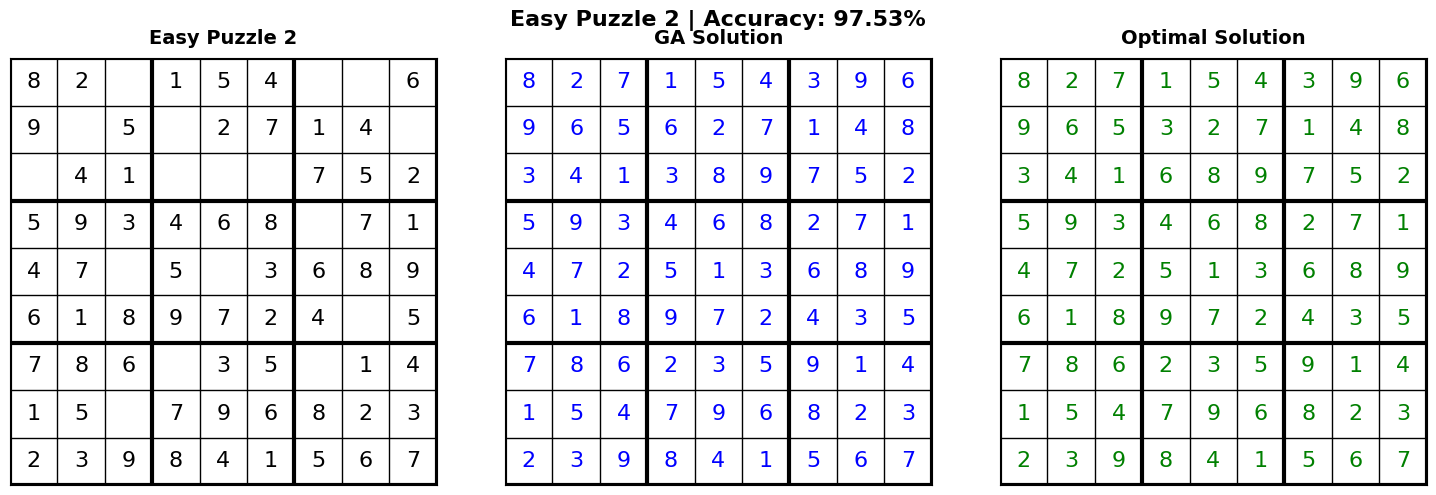

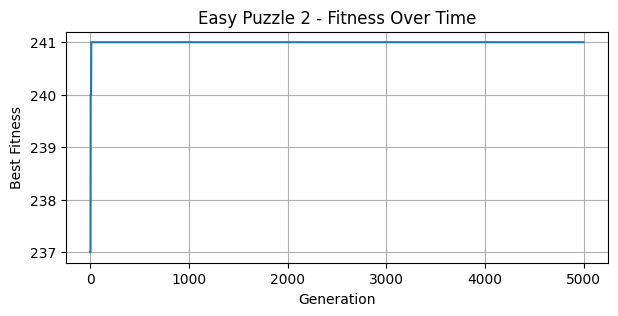

🎯 Accuracy (GA vs Optimal): 97.53%

🎯 Puzzle 3 (Easy)
Generation 0 | Best fitness: 239
Generation 50 | Best fitness: 241
Generation 100 | Best fitness: 241
Generation 150 | Best fitness: 241
Generation 200 | Best fitness: 241
Generation 250 | Best fitness: 241
Generation 300 | Best fitness: 241
Generation 350 | Best fitness: 241
Generation 400 | Best fitness: 241
Generation 450 | Best fitness: 241
Generation 500 | Best fitness: 241
Generation 550 | Best fitness: 241
Generation 600 | Best fitness: 241
Generation 650 | Best fitness: 241
Generation 700 | Best fitness: 241
Generation 750 | Best fitness: 241
Generation 800 | Best fitness: 241
Generation 850 | Best fitness: 241
Generation 900 | Best fitness: 241
Generation 950 | Best fitness: 241
Generation 1000 | Best fitness: 241
Generation 1050 | Best fitness: 241
Generation 1100 | Best fitness: 241
Generation 1150 | Best fitness: 241
Generation 1200 | Best fitness: 241
Generation 1250 | Best fitness: 241
Generation 1300 | Best fitness: 2

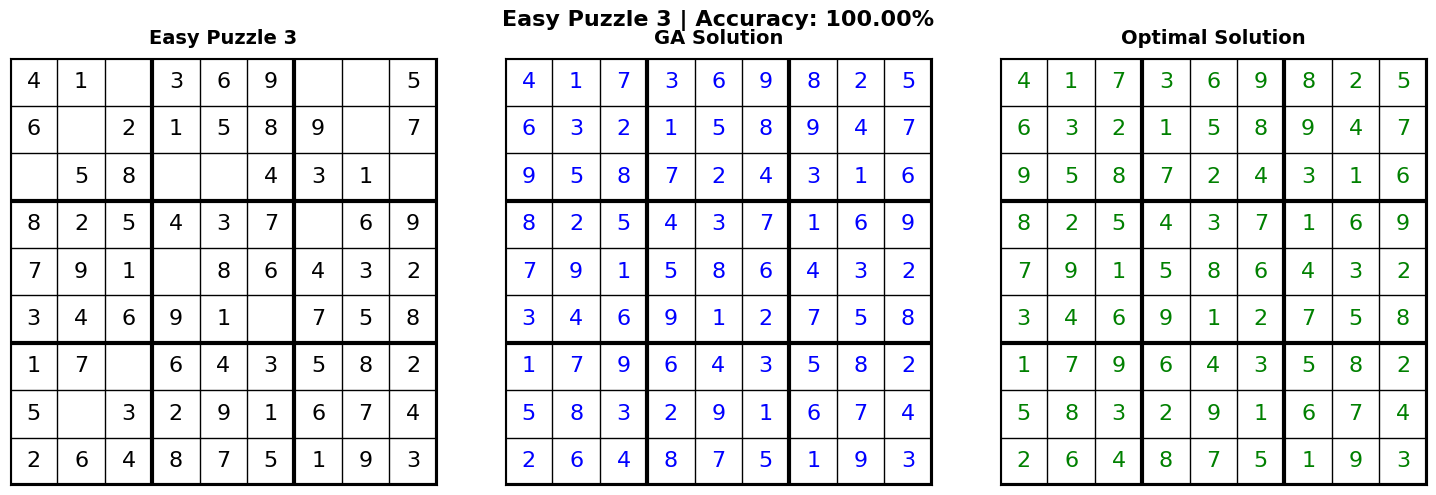

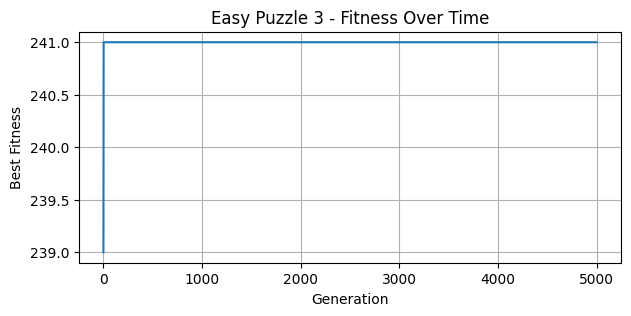

🎯 Accuracy (GA vs Optimal): 100.00%


🧩 Solving Medium Puzzles

🎯 Puzzle 1 (Medium)
Generation 0 | Best fitness: 206
Generation 50 | Best fitness: 222
Generation 100 | Best fitness: 223
Generation 150 | Best fitness: 224
Generation 200 | Best fitness: 224
Generation 250 | Best fitness: 224
Generation 300 | Best fitness: 225
Generation 350 | Best fitness: 225
Generation 400 | Best fitness: 226
Generation 450 | Best fitness: 227
Generation 500 | Best fitness: 227
Generation 550 | Best fitness: 227
Generation 600 | Best fitness: 227
Generation 650 | Best fitness: 227
Generation 700 | Best fitness: 227
Generation 750 | Best fitness: 229
Generation 800 | Best fitness: 231
Generation 850 | Best fitness: 231
Generation 900 | Best fitness: 231
Generation 950 | Best fitness: 231
Generation 1000 | Best fitness: 231
Generation 1050 | Best fitness: 231
Generation 1100 | Best fitness: 231
Generation 1150 | Best fitness: 231
Generation 1200 | Best fitness: 231
Generation 1250 | Best fitness: 231
Gen

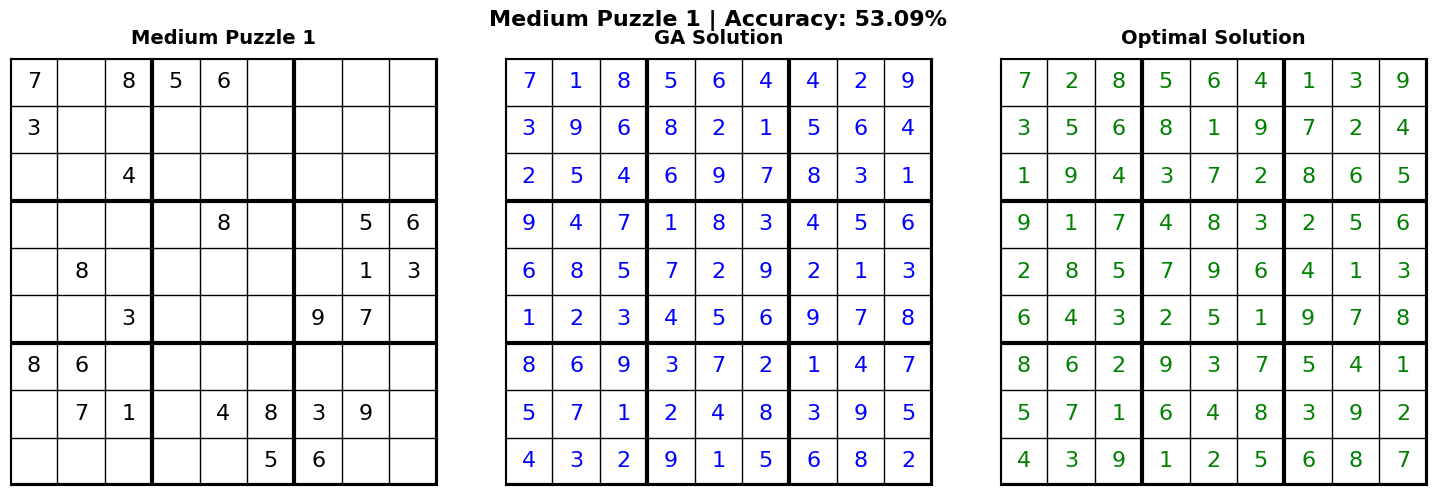

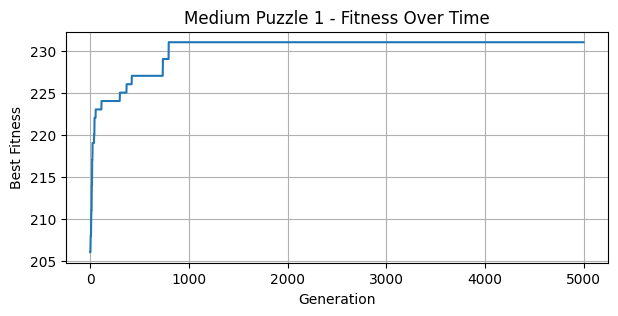

🎯 Accuracy (GA vs Optimal): 53.09%

🎯 Puzzle 2 (Medium)
Generation 0 | Best fitness: 205
Generation 50 | Best fitness: 223
Generation 100 | Best fitness: 227
Generation 150 | Best fitness: 233
Generation 200 | Best fitness: 234
Generation 250 | Best fitness: 234
Generation 300 | Best fitness: 238
Generation 350 | Best fitness: 238
Generation 400 | Best fitness: 238
Generation 450 | Best fitness: 238
Generation 500 | Best fitness: 238
Generation 550 | Best fitness: 238
Generation 600 | Best fitness: 238
Generation 650 | Best fitness: 238
Generation 700 | Best fitness: 238
Generation 750 | Best fitness: 238
Generation 800 | Best fitness: 238
Generation 850 | Best fitness: 238
Generation 900 | Best fitness: 238
Generation 950 | Best fitness: 238
Generation 1000 | Best fitness: 238
Generation 1050 | Best fitness: 238
Generation 1100 | Best fitness: 238
Generation 1150 | Best fitness: 238
Generation 1200 | Best fitness: 238
Generation 1250 | Best fitness: 238
Generation 1300 | Best fitness:

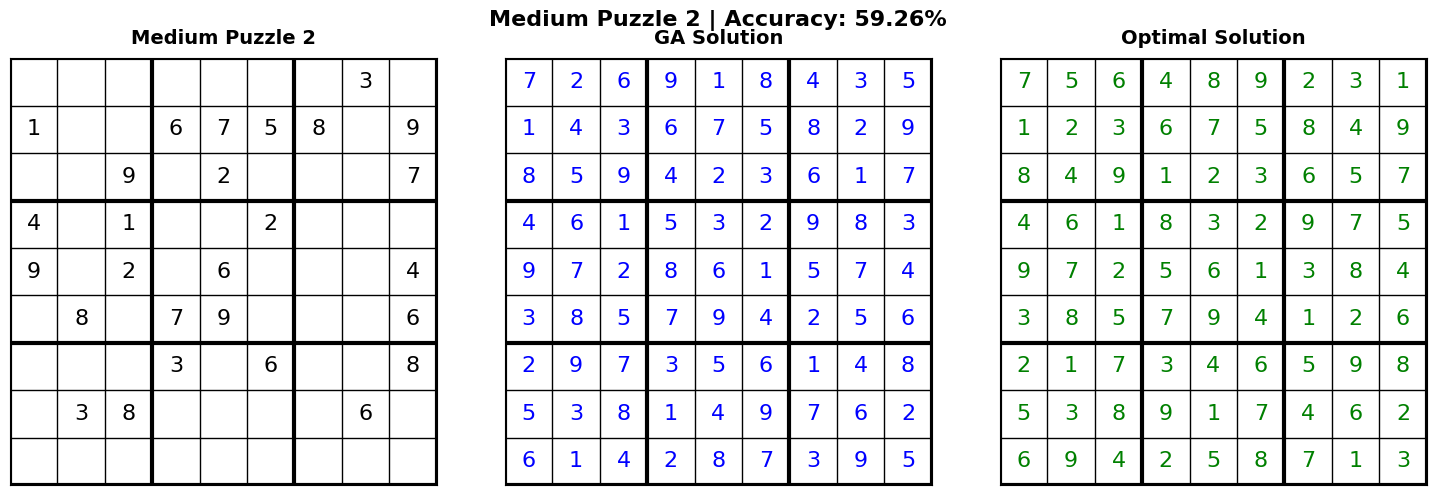

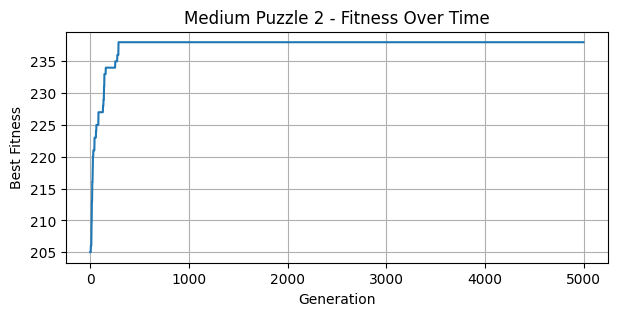

🎯 Accuracy (GA vs Optimal): 59.26%

🎯 Puzzle 3 (Medium)
Generation 0 | Best fitness: 213
Generation 50 | Best fitness: 232
Generation 100 | Best fitness: 237
Generation 150 | Best fitness: 238
Generation 200 | Best fitness: 238
Generation 250 | Best fitness: 238
Generation 300 | Best fitness: 238
Generation 350 | Best fitness: 238
Generation 400 | Best fitness: 238
Generation 450 | Best fitness: 238
Generation 500 | Best fitness: 240
Generation 550 | Best fitness: 240
Generation 600 | Best fitness: 240
Generation 650 | Best fitness: 240
Generation 700 | Best fitness: 240
Generation 750 | Best fitness: 240
Generation 800 | Best fitness: 240
Generation 850 | Best fitness: 240
Generation 900 | Best fitness: 240
Generation 950 | Best fitness: 240
Generation 1000 | Best fitness: 240
Generation 1050 | Best fitness: 240
Generation 1100 | Best fitness: 240
Generation 1150 | Best fitness: 240
Generation 1200 | Best fitness: 240
Generation 1250 | Best fitness: 240
Generation 1300 | Best fitness:

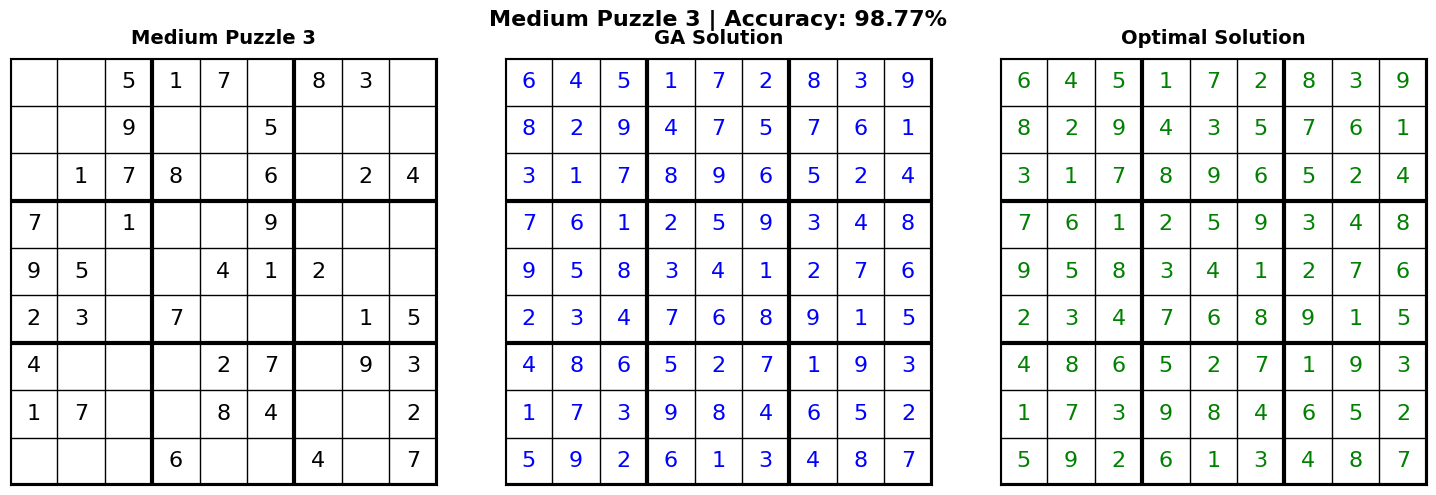

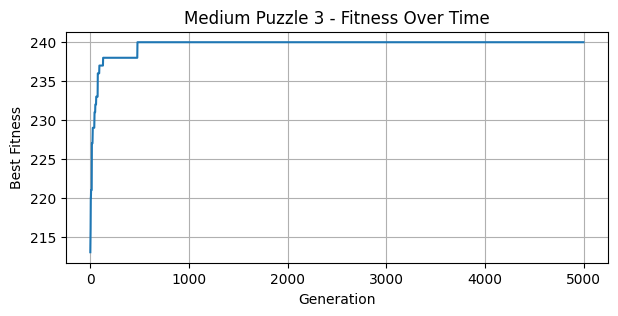

🎯 Accuracy (GA vs Optimal): 98.77%


🧩 Solving Hard Puzzles

🎯 Puzzle 1 (Hard)
Generation 0 | Best fitness: 204
Generation 50 | Best fitness: 221
Generation 100 | Best fitness: 229
Generation 150 | Best fitness: 229
Generation 200 | Best fitness: 229
Generation 250 | Best fitness: 229
Generation 300 | Best fitness: 229
Generation 350 | Best fitness: 229
Generation 400 | Best fitness: 229
Generation 450 | Best fitness: 229
Generation 500 | Best fitness: 229
Generation 550 | Best fitness: 229
Generation 600 | Best fitness: 229
Generation 650 | Best fitness: 229
Generation 700 | Best fitness: 229
Generation 750 | Best fitness: 229
Generation 800 | Best fitness: 229
Generation 850 | Best fitness: 229
Generation 900 | Best fitness: 229
Generation 950 | Best fitness: 229
Generation 1000 | Best fitness: 229
Generation 1050 | Best fitness: 229
Generation 1100 | Best fitness: 229
Generation 1150 | Best fitness: 229
Generation 1200 | Best fitness: 229
Generation 1250 | Best fitness: 229
Generati

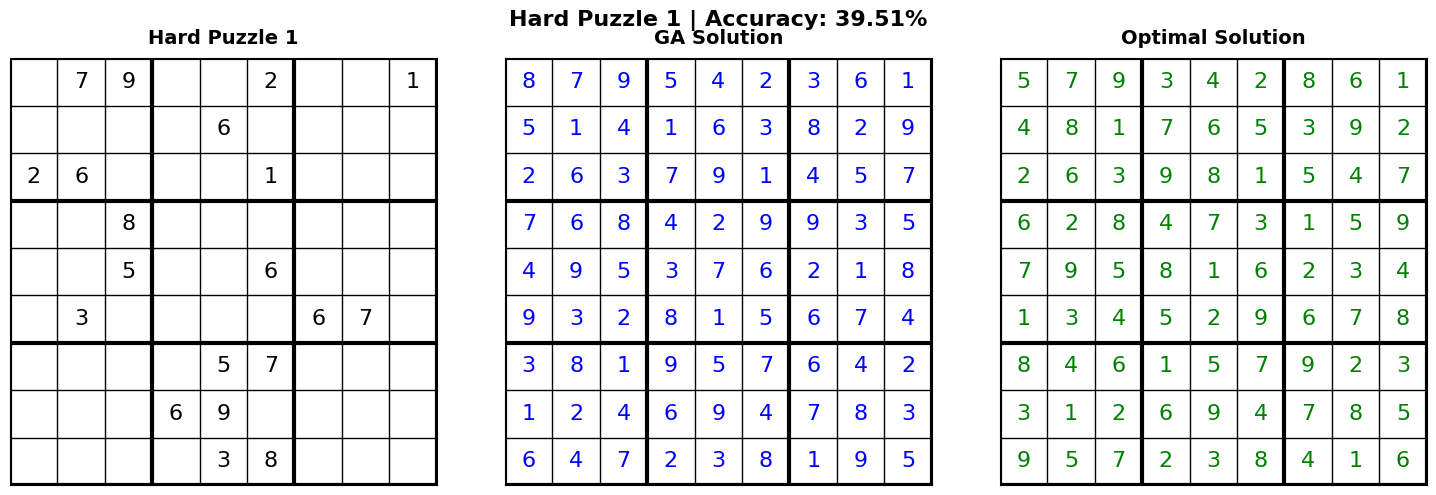

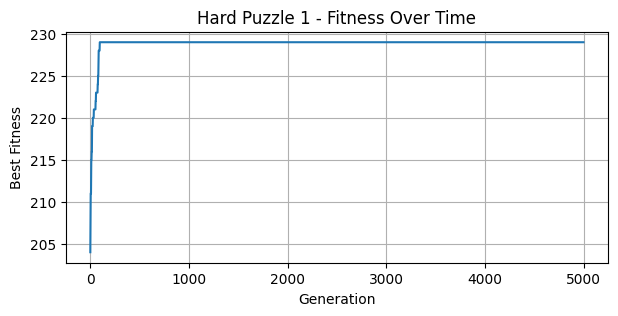

🎯 Accuracy (GA vs Optimal): 39.51%

🎯 Puzzle 2 (Hard)
Generation 0 | Best fitness: 204
Generation 50 | Best fitness: 218
Generation 100 | Best fitness: 223
Generation 150 | Best fitness: 230
Generation 200 | Best fitness: 230
Generation 250 | Best fitness: 230
Generation 300 | Best fitness: 230
Generation 350 | Best fitness: 230
Generation 400 | Best fitness: 230
Generation 450 | Best fitness: 232
Generation 500 | Best fitness: 232
Generation 550 | Best fitness: 232
Generation 600 | Best fitness: 232
Generation 650 | Best fitness: 232
Generation 700 | Best fitness: 232
Generation 750 | Best fitness: 232
Generation 800 | Best fitness: 232
Generation 850 | Best fitness: 232
Generation 900 | Best fitness: 232
Generation 950 | Best fitness: 232
Generation 1000 | Best fitness: 232
Generation 1050 | Best fitness: 232
Generation 1100 | Best fitness: 232
Generation 1150 | Best fitness: 232
Generation 1200 | Best fitness: 232
Generation 1250 | Best fitness: 232
Generation 1300 | Best fitness: 2

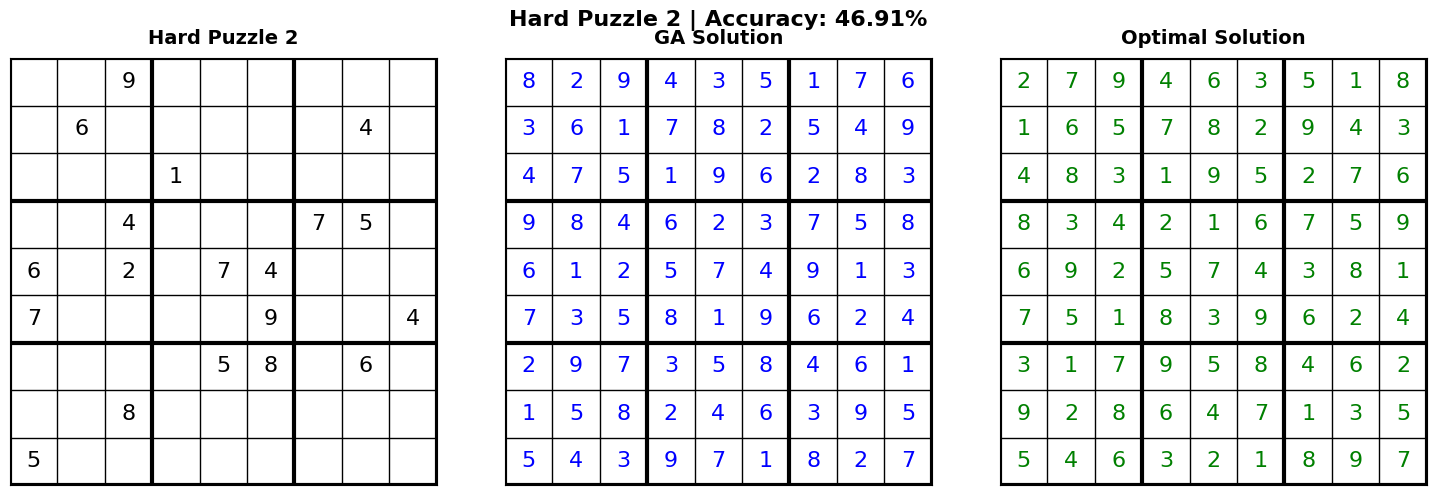

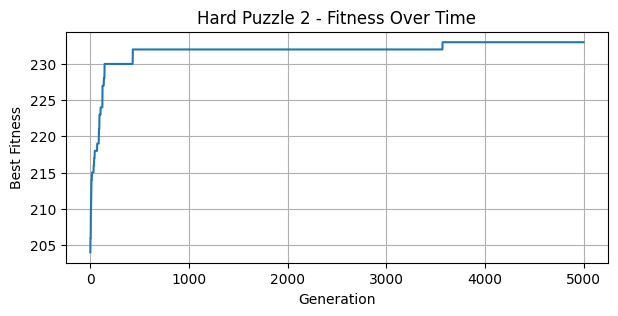

🎯 Accuracy (GA vs Optimal): 46.91%

🎯 Puzzle 3 (Hard)
Generation 0 | Best fitness: 202
Generation 50 | Best fitness: 222
Generation 100 | Best fitness: 227
Generation 150 | Best fitness: 234
Generation 200 | Best fitness: 235
Generation 250 | Best fitness: 235
Generation 300 | Best fitness: 235
Generation 350 | Best fitness: 235
Generation 400 | Best fitness: 235
Generation 450 | Best fitness: 235
Generation 500 | Best fitness: 235
Generation 550 | Best fitness: 235
Generation 600 | Best fitness: 235
Generation 650 | Best fitness: 235
Generation 700 | Best fitness: 235
Generation 750 | Best fitness: 235
Generation 800 | Best fitness: 235
Generation 850 | Best fitness: 235
Generation 900 | Best fitness: 235
Generation 950 | Best fitness: 235
Generation 1000 | Best fitness: 235
Generation 1050 | Best fitness: 235
Generation 1100 | Best fitness: 235
Generation 1150 | Best fitness: 235
Generation 1200 | Best fitness: 235
Generation 1250 | Best fitness: 235
Generation 1300 | Best fitness: 2

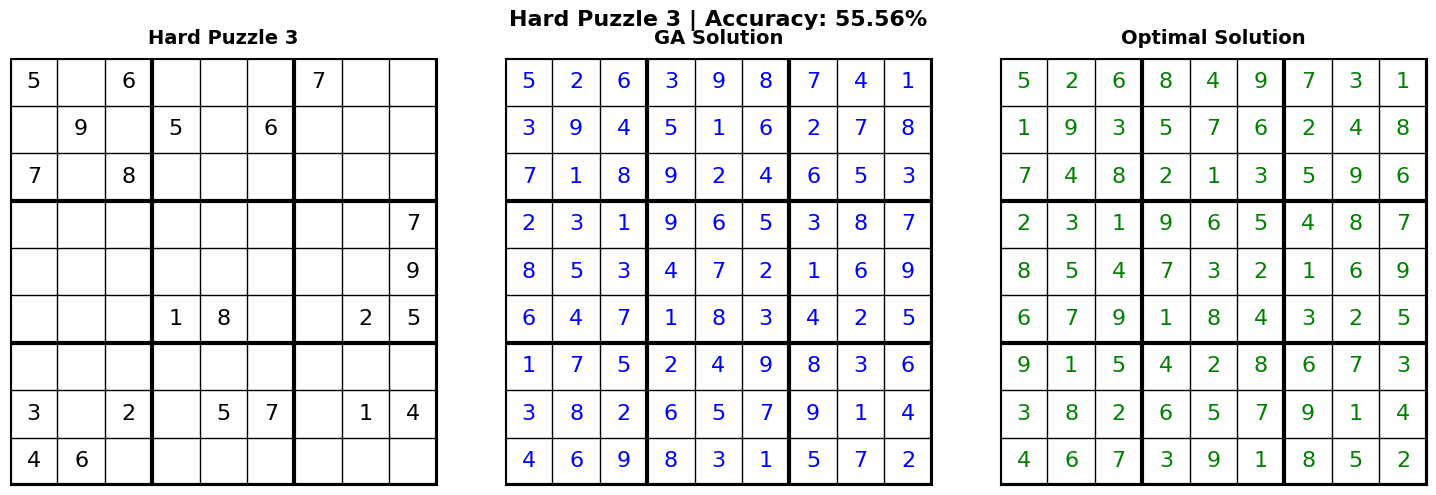

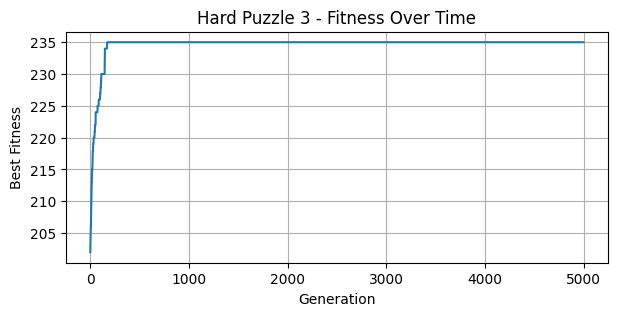

🎯 Accuracy (GA vs Optimal): 55.56%



In [18]:
if __name__ == "__main__":
    levels = [
        ("Easy", EASY, EASY_SOLUTIONS),
        ("Medium", MEDIUM, MEDIUM_SOLUTIONS),
        ("Hard", HARD, HARD_SOLUTIONS)
    ]

    for difficulty, puzzles, solutions in levels:
        print(f"\n==============================")
        print(f"🧩 Solving {difficulty} Puzzles")
        print(f"==============================\n")

        for idx, (puzzle, correct_solution) in enumerate(zip(puzzles, solutions)):
            print(f"🎯 Puzzle {idx+1} ({difficulty})")
            ga_solution, fitness_history = genetic_algorithm(puzzle)

            # 🧾 Compute accuracy
            correct = np.sum(ga_solution == correct_solution)
            accuracy = (correct / 81) * 100

            # -------------------------------
            # 🖼️ Visualize
            # -------------------------------
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))
            plot_sudoku_grid(axes[0], puzzle, f"{difficulty} Puzzle {idx+1}", color="black")
            plot_sudoku_grid(axes[1], ga_solution, "GA Solution", color="blue")
            plot_sudoku_grid(axes[2], correct_solution, "Optimal Solution", color="green")
            plt.suptitle(f"{difficulty} Puzzle {idx+1} | Accuracy: {accuracy:.2f}%", fontsize=16, fontweight="bold")
            plt.tight_layout()
            plt.show()

            # Fitness curve
            plt.figure(figsize=(7,3))
            plt.plot(fitness_history)
            plt.title(f"{difficulty} Puzzle {idx+1} - Fitness Over Time")
            plt.xlabel("Generation")
            plt.ylabel("Best Fitness")
            plt.grid(True)
            plt.show()

            print(f"🎯 Accuracy (GA vs Optimal): {accuracy:.2f}%\n")